In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost
import warnings
warnings.filterwarnings('ignore')

In [0]:
attrition = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [0]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [0]:
# Looking for NaN
display(attrition.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

Text(0.5, 1.0, 'Attrition Breakdown')

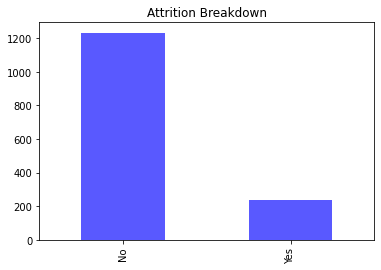

In [0]:
attrition.Attrition.value_counts().plot(kind='bar', color="blue", alpha=.65)
plt.title("Attrition Breakdown")

Text(0, 0.5, 'Frequency of Attrition')

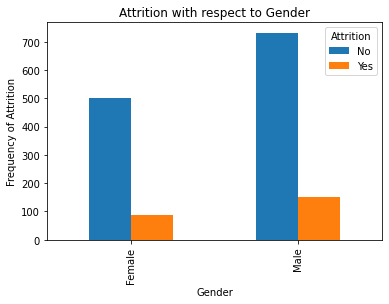

In [0]:
pd.crosstab(attrition.Gender,attrition.Attrition).plot(kind='bar')
plt.title('Attrition with respect to Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Attrition')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

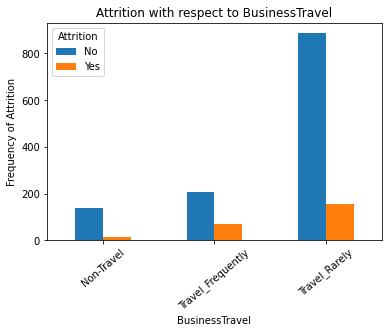

In [0]:
pd.crosstab(attrition.BusinessTravel,attrition.Attrition).plot(kind='bar')
plt.title('Attrition with respect to BusinessTravel')
plt.xlabel('BusinessTravel')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

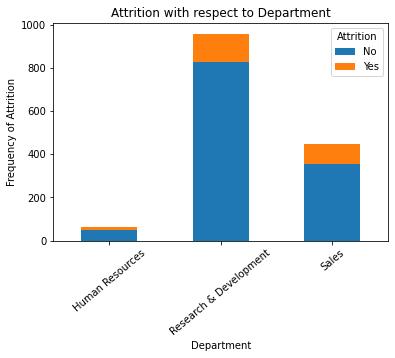

In [0]:
pd.crosstab(attrition.Department,attrition.Attrition).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

Text(0, 0.5, 'Frequency of Attrition')

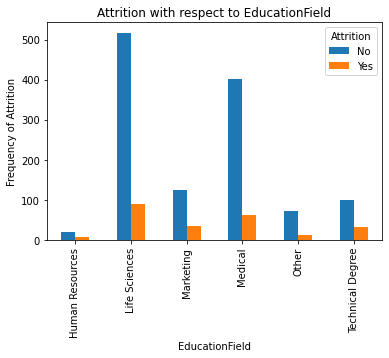

In [0]:
pd.crosstab(attrition['EducationField'],attrition['Attrition']).plot(kind='bar',stacked=False)
plt.title('Attrition with respect to EducationField')
plt.xlabel('EducationField')
plt.ylabel('Frequency of Attrition')

Text(0, 0.5, 'Frequency of Attrition')

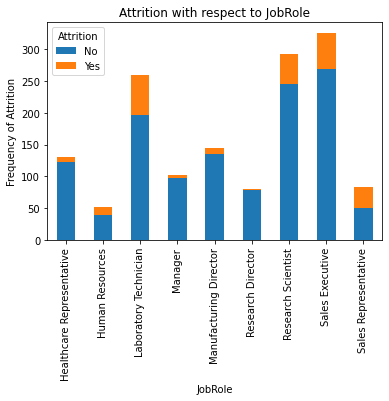

In [0]:
pd.crosstab(attrition['JobRole'],attrition['Attrition']).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to JobRole')
plt.xlabel('JobRole')
plt.ylabel('Frequency of Attrition')

Text(0, 0.5, 'Frequency of Attrition')

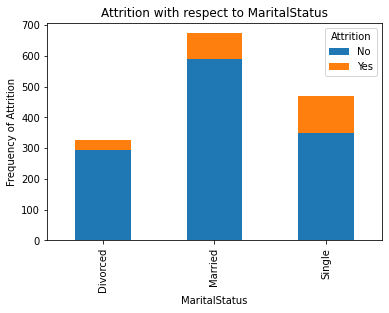

In [0]:
pd.crosstab(attrition['MaritalStatus'],attrition['Attrition']).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Frequency of Attrition')

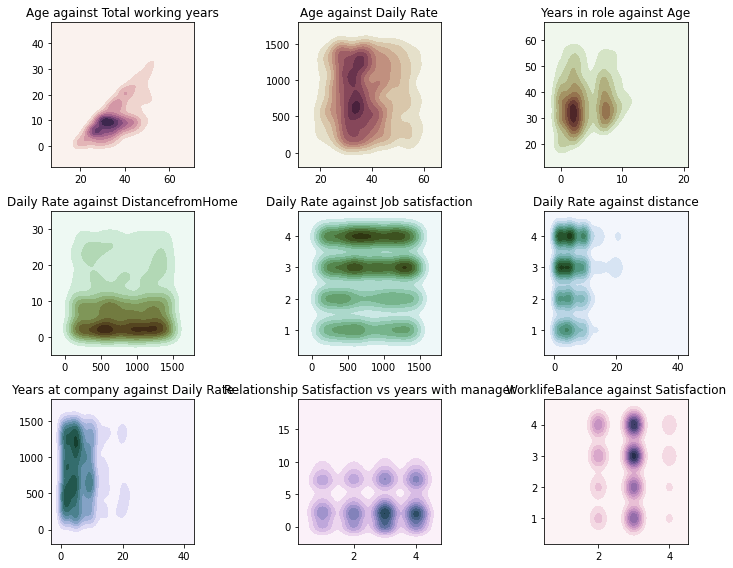

In [0]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(10, 8), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = attrition['Age'].values
y = attrition['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['Age'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against Daily Rate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsInCurrentRole'].values
y = attrition['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Years in role against Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'Daily Rate against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate against Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'Daily Rate against distance')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years at company against Daily Rate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['RelationshipSatisfaction'].values
y = attrition['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['WorkLifeBalance'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

f.tight_layout()

In [0]:
# creating a list of only numerical values
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']
data = [
    go.Heatmap(
        z= attrition[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=attrition[numerical].columns.values,
        y=attrition[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

In [0]:
attrition_tar= attrition.drop(['Attrition'], axis=1)
y=attrition['Attrition']

In [0]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
#from sklearn.cross_validation import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
x_train, x_test, y_train, y_test = train_test_split(attrition_tar, 
                                                         y, 
                                                         train_size= 0.80,
                                                         random_state=0);

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1176, 34)
(1176,)
(294, 34)
(294,)


In [0]:
type(y_train)

pandas.core.series.Series

In [0]:
def encoding(data):
    # Empty list to store columns with categorical data
    categorical = []
    for col, value in data.iteritems():
        if value.dtype == 'object':
            categorical.append(col)

    # Store the numerical columns in a list numerical
    numerical = data.columns.difference(categorical)
    attrition_cat = data[categorical]
    attrition_cat = pd.get_dummies(attrition_cat)
    # Store the numerical features to a dataframe attrition_num
    attrition_num = data[numerical]
    # Concat the two dataframes together columnwise
    attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)
    print(attrition_final.columns)
    return attrition_final

In [0]:
x_train_encode=encoding(x_train)
x_train_encode.shape

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

(1176, 55)

In [0]:
x_test_encode=encoding(x_test)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

In [0]:
def target_encode(data):
    # Define a dictionary for the target mapping
    target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
    target = data.apply(lambda x: target_map[x])
    return target

In [0]:
y_train_encode=target_encode(y_train)
y_test_encode=target_encode(y_test)

In [0]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(x_train_encode,y_train_encode)


**Random** **Forest** **Classifier**

In [0]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [0]:
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [0]:
rf_predictions = rf.predict(x_test_encode)
print("Predictions finished")

Predictions finished


In [0]:
print("Accuracy score: {}".format(accuracy_score(y_test_encode, rf_predictions)))
print("="*80)
print(classification_report(y_test_encode, rf_predictions))

Accuracy score: 0.8537414965986394
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       245
           1       0.57      0.49      0.53        49

    accuracy                           0.85       294
   macro avg       0.74      0.71      0.72       294
weighted avg       0.85      0.85      0.85       294



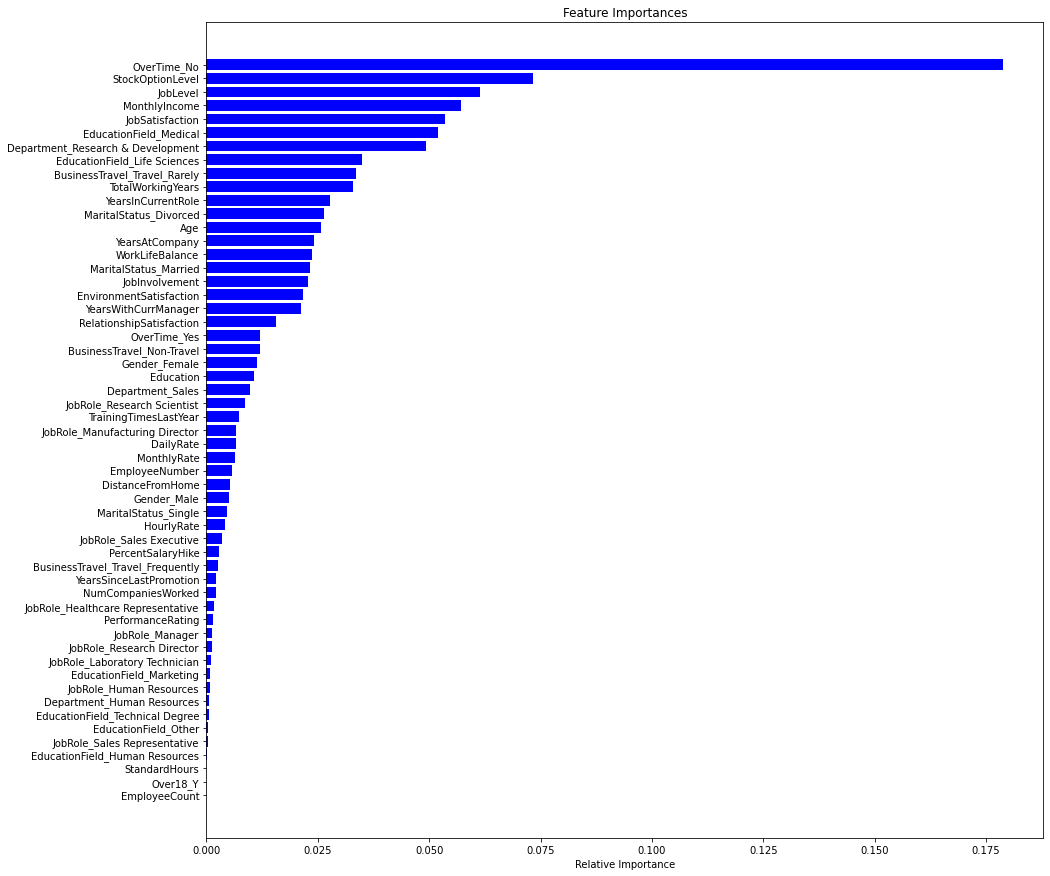

In [0]:
features = x_train_encode.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Decision Tree**

In [0]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(smote_train, smote_target)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [0]:
dt_predictions = dt.predict(x_test_encode)
print("Predictions finished")

Predictions finished


In [0]:
print("Accuracy score: {}".format(accuracy_score(y_test_encode, dt_predictions)))
print("="*80)
print(classification_report(y_test_encode, dt_predictions))

Accuracy score: 0.7585034013605442
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       245
           1       0.30      0.35      0.32        49

    accuracy                           0.76       294
   macro avg       0.58      0.59      0.59       294
weighted avg       0.77      0.76      0.76       294



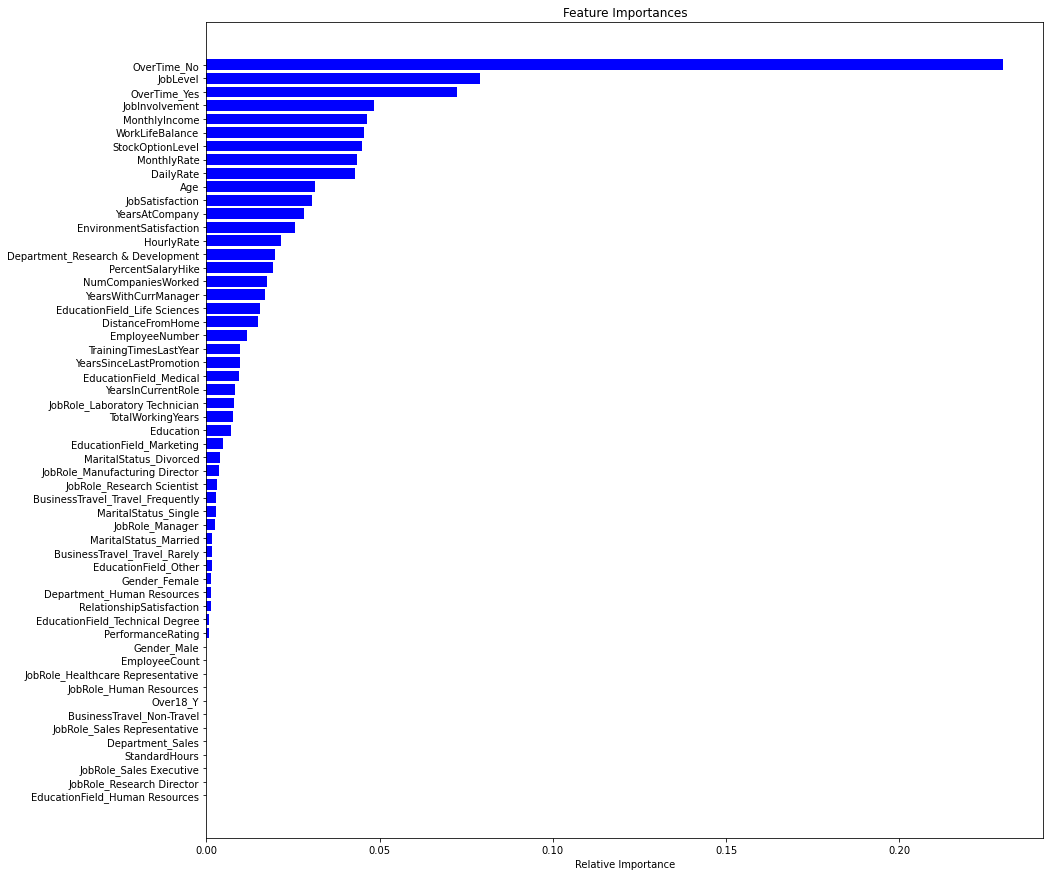

In [0]:
features = x_train_encode.columns.values
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Gradient Boosting Classifier**

In [0]:
# Gradient Boosting Hyper-parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [0]:
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(x_test_encode)

In [0]:
print(accuracy_score(y_test_encode, gb_predictions))
print("="*80)
print(classification_report(y_test_encode, gb_predictions))

0.8605442176870748
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       245
           1       0.64      0.37      0.47        49

    accuracy                           0.86       294
   macro avg       0.76      0.66      0.69       294
weighted avg       0.84      0.86      0.84       294



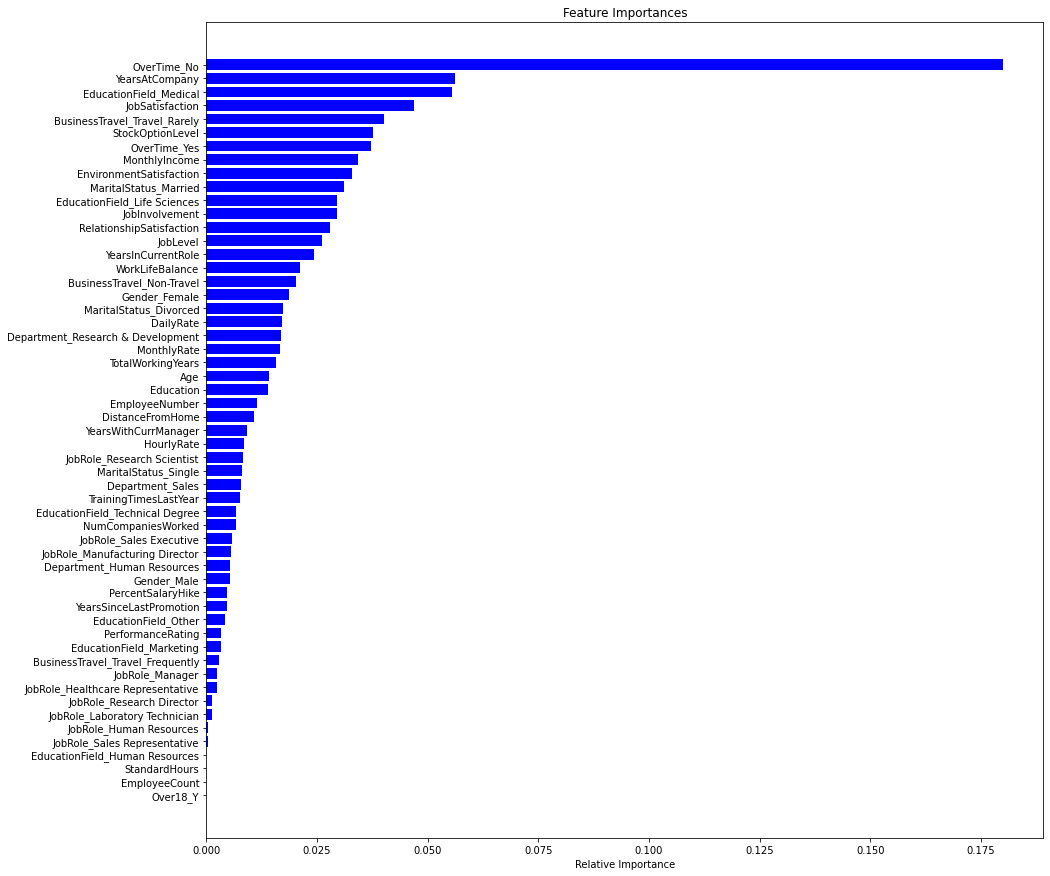

In [0]:
features = x_train_encode.columns.values
importances = gb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Models_AccuracyPrecisionF1 score**

Random Forest_85.37__0.85__0.85

Decision Tree__75.85__ 0.77__0.76

Gradient Boosting__86.05__0.84__0.86